Question 1 - Extracting Tesla Stock Data Using yfinance 

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.6 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 90.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 99.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 113.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 31.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138892 sha256=ac5ad09a8cedd2e433a22b8b193329877db2fa52dabcebe39f5aab6aedbb3896
  Stored in directory: /home/jupyterlab/.cach

Question 1 - Extracting Tesla Stock Data Using yfinance 

In [2]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import pandas as pd
from bs4 import BeautifulSoup



In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
tesla = yf.Ticker("TSLA")
tesla_stock=tesla.history(period="max")
tesla_stock.reset_index(inplace=True)
tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Q2- extract revenue data using webscraping

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).content
soup = BeautifulSoup(html_data,'html.parser')

In [6]:
#find all the tables in soup
tables = soup.find_all('table')
tesla_table = None
#look for Revenue table
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        tesla_table = table
        break
tesla_table
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in tesla_table.find_all("tr"):
    col = row.find_all("td")
    if len(col) == 2:  
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()



,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Q3 - Extracting GameStop Stock Data Using yfinance

In [7]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


Q4- Extract GameStop revenue data using WebScraping

In [8]:
url2=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_g = requests.get(url2).content
soup2= BeautifulSoup(html_data_g, "html.parser")
tables2=soup2.find_all("table")
gme_table=None
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

for table in tables2:
    if "Quarterly Revenue" in table.get_text():
        gme_table = table
        break

for row in gme_table.find_all('tr'):
    col = row.find_all('td')
    if len (col) ==2:
        date = col[0].text
        revenue = col[1].text
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


Q5- Plot Tesla Stock Graph

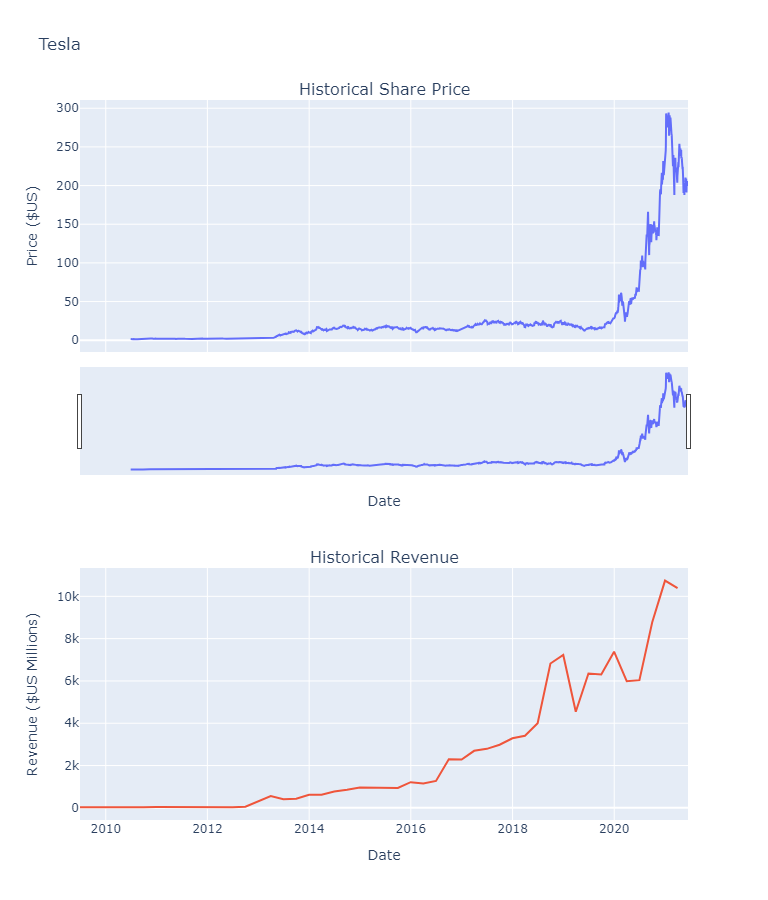

In [12]:
make_graph(tesla_stock,tesla_revenue,'Tesla')


Q6 - Plot Game Stop Stock graph

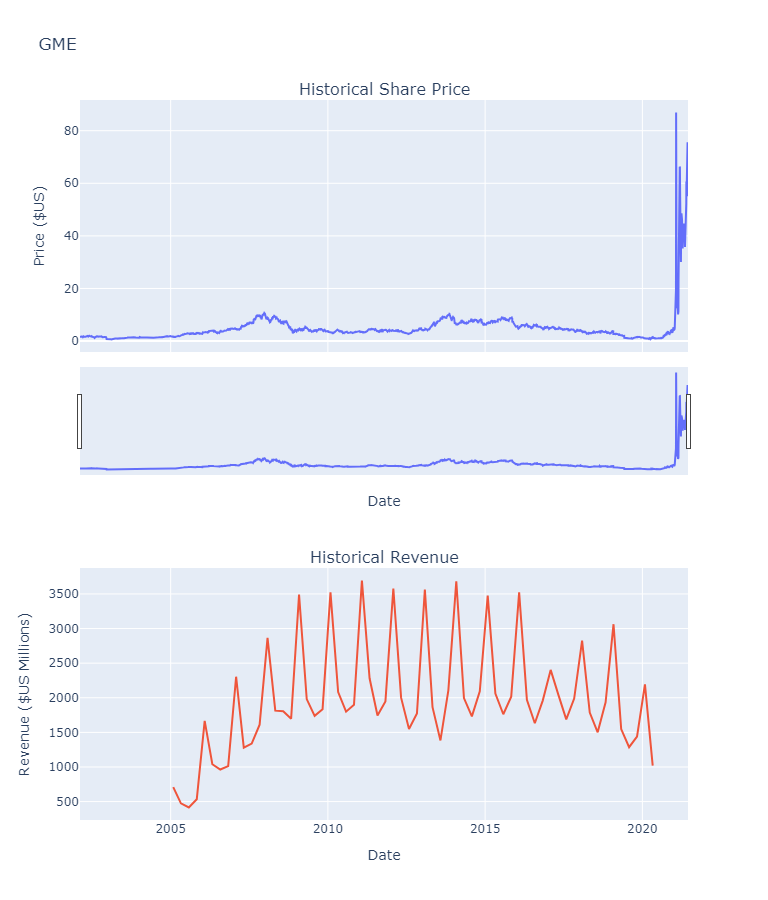

In [10]:
make_graph(gme_data,gme_revenue,'GME')